In [ ]:
# %load_ext autoreload
# %reload_ext autoreload

In [1]:
import keras
from keras.models import Model, load_model
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from visuals import view_nn_images, view_one_image

from layer_output import path_to_tensor, get_dense_layers_from_image

Using TensorFlow backend.


In [66]:
clothing_to_vector_model = load_model('saved_models/clothes2_cnn.h5')
clothing_to_vector_model.load_weights('saved_models/weights.best.from_scratch.hdf5')

# dress_to_shoe = load_model('saved_models/dress2shoe2.h5')
# dress_to_shoe.load_weights('saved_models/dress2shoe_weights2.hdf5')

dress_to_shoe = load_model('saved_models/dress2shoe_aws.h5')
dress_to_shoe.load_weights('saved_models/dress2shoe_weights_aws.hdf5')

/Users/maileivargas/anaconda3/envs/project5_2/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Link to shoes

In [84]:
shoe_df = pd.read_pickle('saved_models/dense_shoe_df_aws.pickle')
shoe_df.index = pd.Series(shoe_df.index).apply(lambda x: '../' + x)
print(shoe_df.shape)
shoe_df.head()

(22215, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
../data/shoes/train/calf_boots/7996915.360442.jpg,0.353889,0.0,0.0,1.056185,0.0,0.000000,0.0,0.0,0.0,0.398484,...,0.000000,0.0,0.000000,2.076309,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/7986561.39823.jpg,0.511046,0.0,0.0,0.933013,0.0,0.000000,0.0,0.0,0.0,0.263282,...,0.000000,0.0,0.000000,1.889094,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/7791989.1162.jpg,0.777171,0.0,0.0,0.942513,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.409845,0.0,0.000000,1.896668,0.0,0.0,0.0,0.0,0.0,0.000000
../data/shoes/train/calf_boots/8016354.278.jpg,0.000000,0.0,0.0,0.000000,0.0,0.488565,0.0,0.0,0.0,0.418161,...,0.000000,0.0,0.361013,1.360135,0.0,0.0,0.0,0.0,0.0,0.346639
../data/shoes/train/calf_boots/8018474.4734.jpg,0.562315,0.0,0.0,0.890467,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.765136,0.0,0.0,0.0,0.0,0.0,0.000000


In [85]:
# find K-Nearest Neighbors 
nn_top_shoe = NearestNeighbors(n_neighbors=4, metric='cosine').fit(shoe_df)
# nn_top_shoe_euclid = NearestNeighbors(n_neighbors=4, metric='euclidean').fit(shoe_df)
distances_shoe, indices_shoe = nn_top_shoe.kneighbors(shoe_df)

# create a dataframe of indices of nearest neighbors
nn_df_shoe = pd.DataFrame(np.array(shoe_df.index[indices_shoe]))
print(nn_df_shoe.shape)
nn_df_shoe.head()

(22215, 4)


,0,1,2,3
0,../data/shoes/train/calf_boots/7996915.360442.jpg,../data/shoes/train/calf_boots/7993044.20.jpg,../data/shoes/train/calf_boots/7199177.42226.jpg,../data/shoes/train/calf_boots/7881190.325.jpg
1,../data/shoes/train/calf_boots/7986561.39823.jpg,../data/shoes/train/calf_boots/8026080.18.jpg,../data/shoes/train/calf_boots/8100287.399011.jpg,../data/shoes/test/calf_boots/8080540.200.jpg
2,../data/shoes/train/calf_boots/7791989.1162.jpg,../data/shoes/train/calf_boots/7857412.84446.jpg,../data/shoes/train/calf_boots/7970232.352754.jpg,../data/shoes/train/calf_boots/8043805.354485.jpg
3,../data/shoes/train/calf_boots/8016354.278.jpg,../data/shoes/validate/heels/8066091.521.jpg,../data/shoes/train/calf_boots/8003813.364975.jpg,../data/shoes/train/calf_boots/8062389.1430.jpg
4,../data/shoes/train/calf_boots/8018474.4734.jpg,../data/shoes/train/calf_boots/7991836.4045.jpg,../data/shoes/train/calf_boots/8006986.589.jpg,../data/shoes/validate/ankle_boots/7542758.352...


In [112]:
# dress_image: pass in the image as a tensor
# nn_model: fitted nearest neighbor model
# clothing_to_vector_model: CNN model for clothing training loaded with weights from h5 file
# dress_to_shoe: CNN model for links loaded with weights from h5 file 
# get_dense_layers_from_image: imported from layer_output.py

def get_recommendations(dress_image, nn_model=nn_top_shoe, clothing_to_vector_model=clothing_to_vector_model, 
                        dress_to_shoe=dress_to_shoe):
    dress_vector = get_dense_layers_from_image(clothing_to_vector_model, dress_image)
    shoe_vector  = dress_to_shoe.predict(dress_vector)
    distances, indicies = nn_model.kneighbors(-shoe_vector)
    return pd.DataFrame(shoe_df.iloc[indicies.reshape(-1)].index).T

In [113]:
dress_vector = get_dense_layers_from_image(clothing_to_vector_model, path_to_tensor(image_file))
shoe_vector  = dress_to_shoe.predict(dress_vector)

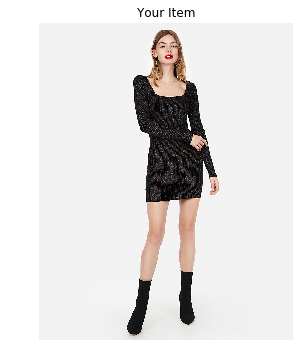

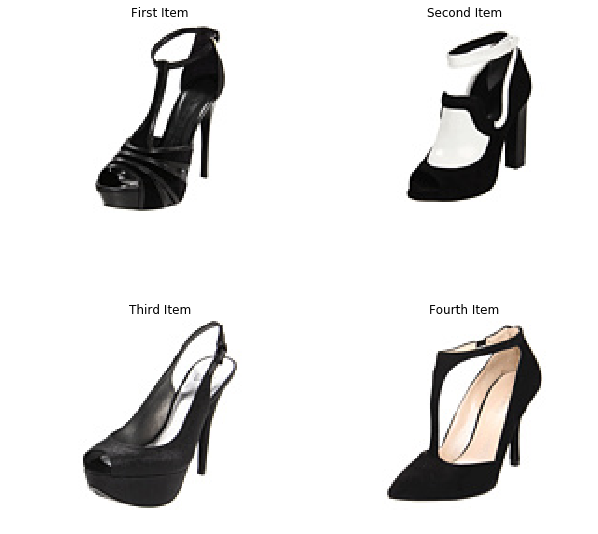

In [115]:
# image_file = '../data/clothing2/test/red_short_dresses/red_short_dresses40.jpg'
image_file = '/Users/maileivargas/Desktop/test8.jpg'
tensor = path_to_tensor(image_file)
# get_recommendations(tensor,nn_model=nn_top_shoe)
view_one_image(image_file)
view_nn_images(get_recommendations(tensor, nn_model = nn_top_shoe),0)